In [1]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In [2]:
import pandas as pd
from sklearn import cluster

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2,max_iter=50,random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels,index=movies.user,columns=['Cluster ID'])

,Cluster ID
user,
john,0
mary,0
bob,0
lisa,1
lee,1
harry,1


In [3]:
import pandas as pd
from sklearn import cluster

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)

centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,4.333333,4.666667,3.0,2.000000
1,1.666667,1.666667,4.0,4.666667


In [4]:
import pandas as pd
from sklearn import cluster
import numpy as np

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames,testData,labels),axis=1),columns=cols)
newusers

,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,0
1,kim,3,2,4,4,1
2,liz,2,3,4,1,0
3,tom,3,2,3,3,1
4,bill,5,4,1,4,0


Text(0, 0.5, 'SSE')

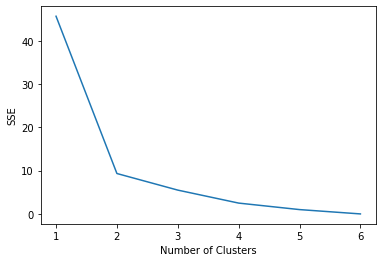

In [5]:
import matplotlib.pyplot as plt  
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)
    
plt.plot(numClusters,SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [6]:
import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


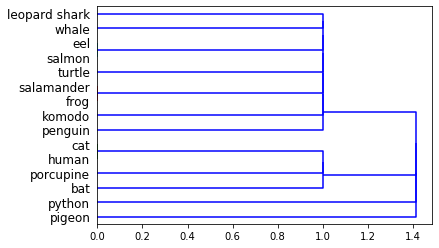

In [11]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('6.vertebrate.csv',header='infer')
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.values,'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

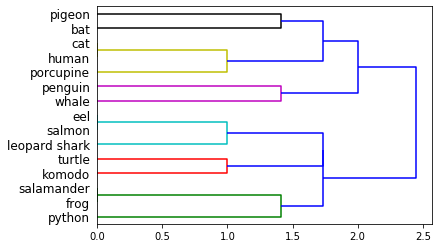

In [12]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('6.vertebrate.csv',header='infer')
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.values,'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

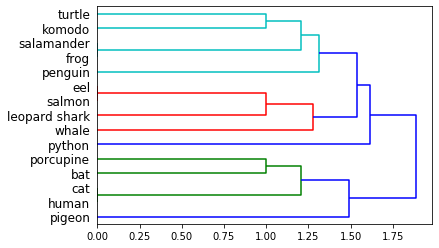

In [13]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('6.vertebrate.csv',header='infer')
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.values,'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

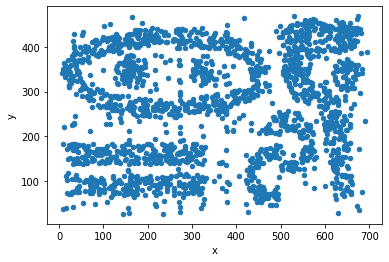

In [15]:
import pandas as pd

data = pd.read_csv('8.chameleon.data.csv',delimiter=' ',names=['x','y'])
data.plot.scatter(x='x',y='y')

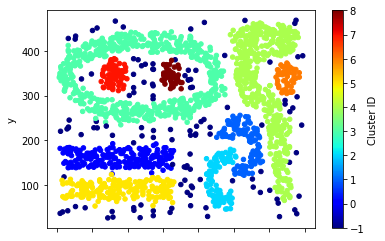

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN

data = pd.read_csv('8.chameleon.data.csv',delimiter=' ',names=['x','y'])
db = DBSCAN(eps=15.5,min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels),axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet')

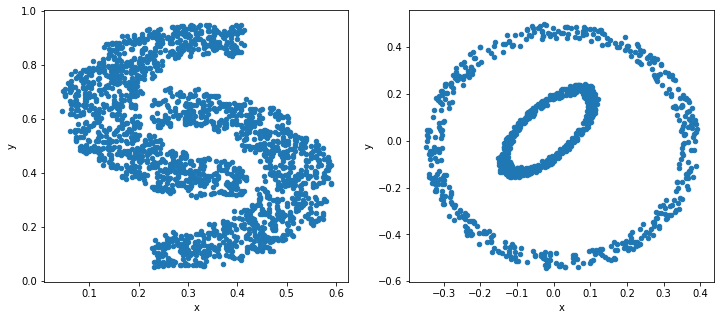

In [17]:
import pandas as pd

data1 = pd.read_csv('8.2d_data.csv',delimiter=' ',names=['x','y'])
data2 = pd.read_csv('8.elliptical.csv',delimiter=' ',names=['x','y'])

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)

Text(0.5, 1.0, 'K-means Clustering')

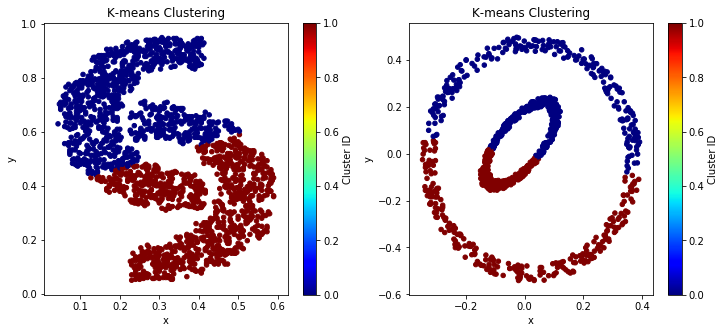

In [18]:
import pandas as pd
from sklearn import cluster

data1 = pd.read_csv('8.2d_data.csv',delimiter=' ',names=['x','y'])
data2 = pd.read_csv('8.elliptical.csv',delimiter=' ',names=['x','y'])

k_means = cluster.KMeans(n_clusters=2,max_iter=50,random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1),axis=1)

k_means2 = cluster.KMeans(n_clusters=2,max_iter=50,random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2),axis=1)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')